In [1]:
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/3932752336.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading Data

In [2]:
def load_data(file_name):
    data = []
    with open(file_name, 'r') as fin:
        for l in fin:
            d = json.loads(l)
            data.append(d)
    return data

In [3]:
df_children_books = load_data('goodreads_books_children.json')
df_children_books = pd.DataFrame(df_children_books)

df_reviews = load_data('goodreads_reviews_children.json')
df_reviews = pd.DataFrame(df_reviews)

df_interactions_filtered = pd.read_csv('df_interactions_filtered.csv')

# Data Preprocessing

In [4]:
df_children_books.dtypes

isbn                    object
text_reviews_count      object
series                  object
country_code            object
language_code           object
popular_shelves         object
asin                    object
is_ebook                object
average_rating          object
kindle_asin             object
similar_books           object
description             object
format                  object
link                    object
authors                 object
publisher               object
num_pages               object
publication_day         object
isbn13                  object
publication_month       object
edition_information     object
publication_year        object
url                     object
image_url               object
book_id                 object
ratings_count           object
work_id                 object
title                   object
title_without_series    object
dtype: object

In [5]:
df_interactions_filtered.dtypes

user_id                   object
book_id                    int64
review_id                 object
is_read                     bool
rating                     int64
review_text_incomplete    object
date_added                object
date_updated              object
read_at                   object
started_at                object
dtype: object

In [6]:
df_reviews.dtypes

user_id         object
book_id         object
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [7]:
# Converting columns to the correct data type
integer_columns = ['text_reviews_count', 'num_pages', 'publication_day', 'publication_month', 'publication_year', 'ratings_count', 'rating', 'n_votes', 'n_comments', 'average_rating']
boolean_columns = ['is_ebook', 'is_read']
list_columns = ['series', 'popular_shelves', 'similar_books', 'authors']
datetime_columns = ['date_added', 'date_updated', 'read_at', 'started_at']

In [9]:
def convert_datatype(df):
    # Convert integer columns that exist in the DataFrame
    df_integer_columns = [col for col in integer_columns if col in df.columns]
    df[df_integer_columns] = df[df_integer_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')
    
    # Convert boolean columns that exist in the DataFrame
    df_boolean_columns = [col for col in boolean_columns if col in df.columns]
    df[df_boolean_columns] = df[df_boolean_columns].map(lambda x: x.lower() == 'true')
    
    # Convert datetime columns that exist in the DataFrame
    df_datetime_columns = [col for col in datetime_columns if col in df.columns]
    df[df_datetime_columns] = df[df_datetime_columns].apply(pd.to_datetime, errors='coerce')

    # Convert list col
    df_list_columns = [col for col in list_columns if col in df.columns]
    
    # Convert remaining columns to string type
    remaining_columns = df.columns.difference(df_integer_columns + df_boolean_columns + df_datetime_columns + df_list_columns)
    df[remaining_columns] = df[remaining_columns].astype(str)

    return df


In [10]:
df_children_books = convert_datatype(df_children_books)

In [11]:
df_children_books.dtypes

isbn                     object
text_reviews_count        int32
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                   bool
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages               float64
publication_day         float64
isbn13                   object
publication_month       float64
edition_information      object
publication_year        float64
url                      object
image_url                object
book_id                  object
ratings_count             int32
work_id                  object
title                    object
title_without_series     object
dtype: object

In [12]:
# Convert book_id back to string in df_interactions_filtered
df_interactions_filtered['book_id'] = df_interactions_filtered['book_id'].astype(str)

In [13]:
# Convert datetime columns in df_interactions_filtered
df_interactions_filtered[datetime_columns] = df_interactions_filtered[datetime_columns].apply(
    pd.to_datetime, format='%a %b %d %H:%M:%S %z %Y', errors='coerce'
)

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/810077808.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_interactions_filtered[datetime_columns] = df_interactions_filtered[datetime_columns].apply(
/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/810077808.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_interactions_filtered[datetime_columns] = df_interactions_filtered[datetime_columns].apply(
/var

In [14]:
df_interactions_filtered.dtypes

user_id                   object
book_id                   object
review_id                 object
is_read                     bool
rating                     int64
review_text_incomplete    object
date_added                object
date_updated              object
read_at                   object
started_at                object
dtype: object

In [15]:
# Convert datetime columns in df_reviews
df_reviews[datetime_columns] = df_reviews[datetime_columns].apply(
    pd.to_datetime, format='%a %b %d %H:%M:%S %z %Y', errors='coerce'
)

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/3094010240.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_reviews[datetime_columns] = df_reviews[datetime_columns].apply(
/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/3094010240.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_reviews[datetime_columns] = df_reviews[datetime_columns].apply(
/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel

In [16]:
df_reviews.dtypes

user_id         object
book_id         object
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

# EDA

In [17]:
# Function to summarize data in dataset
def summarize_df(df):
    print(f'Shape: {df.shape[0]} rows {df.shape[1]} columns')
    for col in df.columns:
        # Numerical
        if col in integer_columns:
            continue

        print(f'Column - {col}, Data type - {df[col].dtype}')

        # Boolean
        if col in boolean_columns:
            print('Number of NA Values:', sum(df[col].isnull()))
            print(df.groupby(col).size())

        # List
        elif col in list_columns:
            print('Number of empty lists or NA Values:', df[col].isnull().sum() + sum(len(item) == 0 for item in df[col] if isinstance(item, list)))

        # Datetime
        elif col in datetime_columns:
            print('Number of NA Values:', sum(df[col].isnull()))
            print('Min value:', min(df[col].dropna()), ', Max value:', max(df[col].dropna()))

        # String
        else:
            print('Number of NA Values:', sum((df[col].str.strip() == '') | (df[col].isnull())))
            if len(df[col].unique()) < 5:
                print('Unique Values:', df[col].unique())
        
        print("-"*40)

In [18]:
summarize_df(df_children_books)

Shape: 124082 rows 29 columns
Column - isbn, Data type - object
Number of NA Values: 20199
----------------------------------------
Column - series, Data type - object
Number of empty lists or NA Values: 81213
----------------------------------------
Column - country_code, Data type - object
Number of NA Values: 0
Unique Values: ['US']
----------------------------------------
Column - language_code, Data type - object
Number of NA Values: 72496
----------------------------------------
Column - popular_shelves, Data type - object
Number of empty lists or NA Values: 0
----------------------------------------
Column - asin, Data type - object
Number of NA Values: 117363
----------------------------------------
Column - is_ebook, Data type - bool
Number of NA Values: 0
is_ebook
False    114606
True       9476
dtype: int64
----------------------------------------
Column - kindle_asin, Data type - object
Number of NA Values: 82960
----------------------------------------
Column - similar_boo

In [19]:
books_numerical_col = [col for col in integer_columns if col in df_children_books.columns]

In [20]:
df_children_books[books_numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
text_reviews_count,124082.0,27.086209,266.547028,0.0,2.00,5.00,15.00,49850.0
num_pages,95885.0,104.782604,117.929600,0.0,32.00,48.00,159.00,4500.0
publication_day,85610.0,9.979301,9.991300,1.0,1.00,6.00,18.00,31.0
publication_month,90014.0,6.301942,3.319179,1.0,3.00,6.00,9.00,12.0
publication_year,104256.0,2004.810812,249.249338,0.0,1999.00,2007.00,2013.00,65535.0
ratings_count,124082.0,522.816525,10838.692247,0.0,10.00,30.00,96.00,1876252.0
average_rating,124082.0,3.910883,0.364855,0.0,3.71,3.94,4.14,5.0


As seen in the statistical summary, the numerical values in df_children_books are not on the same scale, therefore, we will need to scale them before feeding the features into the ML models. There are a large number of missing values for the columns `num_pages`, `publication_day`, `publication_month` and invalid values `publication_year`. Thus, we will be scraping the num_pages along with publication_year from Google Books.

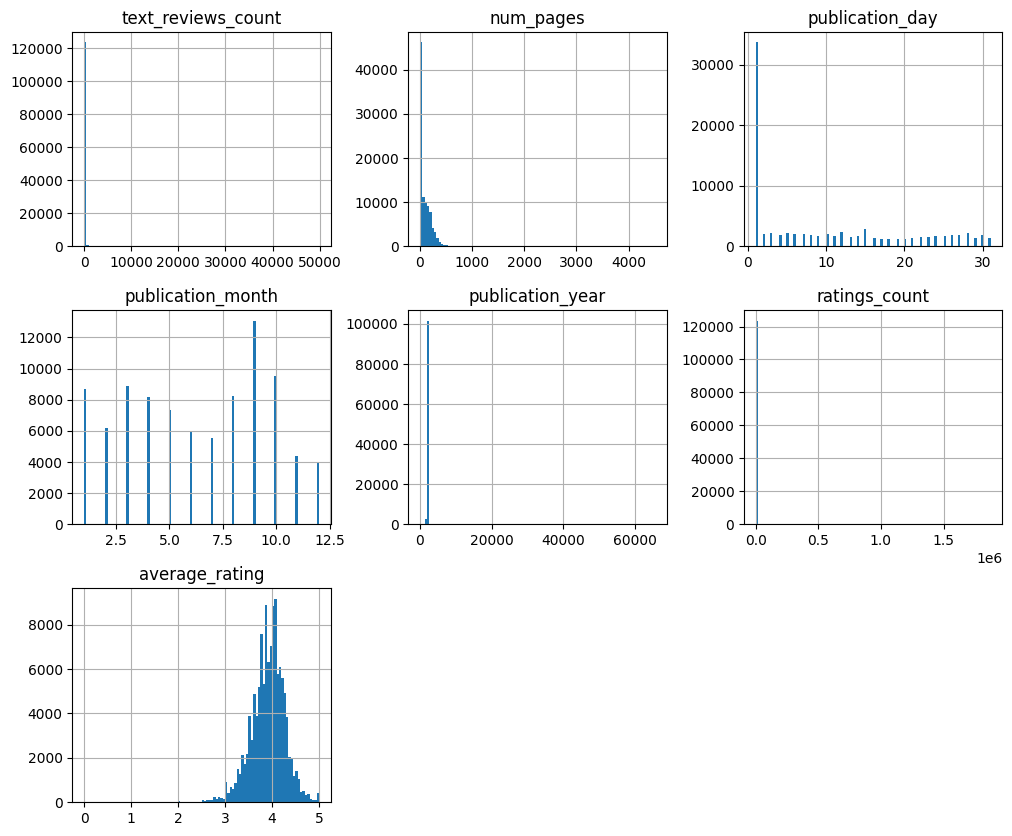

In [21]:
ax = df_children_books[books_numerical_col].hist(figsize=(12,10), bins=100)

As seen from the histograms above, some columns are quite skewed, there are Next, we will use a 

<Figure size 640x480 with 0 Axes>

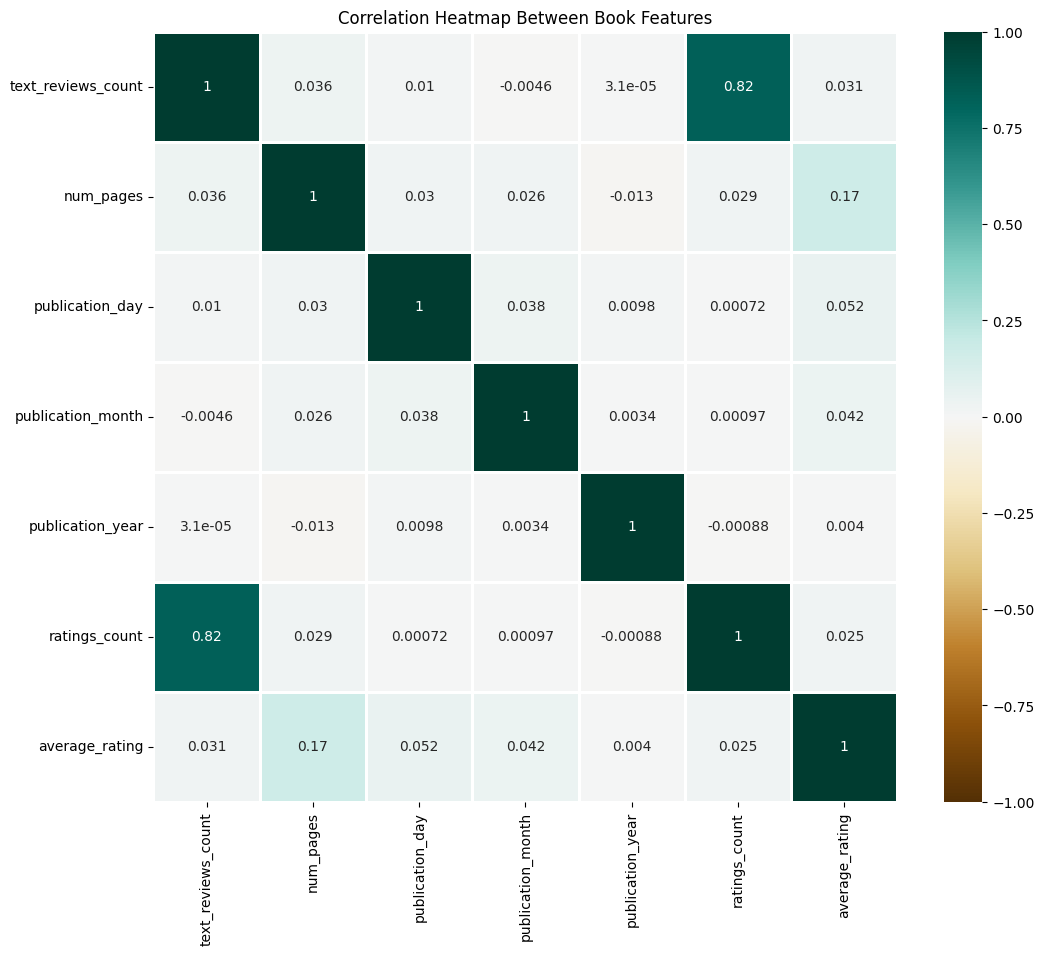

In [22]:
plt.clf()
corr_df_books = df_children_books[books_numerical_col].corr(method='pearson')
plt.figure(figsize=(12,10))
heatmap_books = sns.heatmap(corr_df_books, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap="BrBG", linewidths=2)
heatmap_books.set_title('Correlation Heatmap Between Book Features')
heatmap_books.set_xticklabels(heatmap_books.get_xticklabels(), rotation=90)
plt.show()

### Column Removal Justification for df_children_books
In our analysis of the df_children_books DataFrame, which contains 124,082 rows and 29 columns, we identified specific columns to remove based on their relevance and usefulness for building a recommendation system for books. Below are the columns we decided to exclude, along with the reasons for their removal:

- Insufficient Data: The `series` column had a high number of empty lists and/or null values (81,213 out of 124,082 rows), indicating insufficient data for meaningful analysis.
- Redundancy: Columns like `asin`, `kindle_asin`, and `work_id` were deemed redundant since the isbn column could serve as a unique identifier for each book.
- Uninformative: Columns such as `country_code`, `link`, `url`, and `image_url` do not provide useful information for our recommendation model
- Prioritization: Between `publisher` and `authors`, we retained the `authors` column as we believed that authors are more likely to influence the similarity between books than publishers and between title and title_without_series we retained the `title` column instead of the `title_without_series` column, as the full title is more informative.
- Time granularity: For publication dates, we retained the `publication_year` column as we deemed the day and month less significant for recommendations.

In [23]:
df_children_books_final = df_children_books[['isbn', 'isbn13', 'book_id', 'title', 'authors', 'num_pages', 'language_code', 'description', 'format', 'is_ebook', 'popular_shelves', 'average_rating', 'ratings_count', 'text_reviews_count']]
print(df_children_books_final.shape)
df_children_books_final.head(5)

(124082, 14)


,isbn,isbn13,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count
0,1599150603,9781599150604,287141,The Aeneid for Boys and Girls,"[{'author_id': '3041852', 'role': ''}]",162.0,,"Relates in vigorous prose the tale of Aeneas, ...",Paperback,False,"[{'count': '56', 'name': 'to-read'}, {'count':...",4.13,46,7
1,1934876569,9781934876565,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,"[{'author_id': '19158', 'role': ''}]",216.0,,"To Kara's astonishment, she discovers that a p...",Paperback,False,"[{'count': '515', 'name': 'to-read'}, {'count'...",4.22,98,6
2,0590417010,9780590417013,89378,Dog Heaven,"[{'author_id': '5411', 'role': ''}]",40.0,eng,In Newbery Medalist Cynthia Rylant's classic b...,Hardcover,False,"[{'count': '450', 'name': 'to-read'}, {'count'...",4.43,1331,193
3,0915190575,9780915190577,3209312,"Moths and Mothers, Feathers and Fathers: A Sto...","[{'author_id': '589328', 'role': ''}, {'author...",NaN,,,,False,"[{'count': '8', 'name': 'to-read'}, {'count': ...",4.29,11,4
4,1416904999,9781416904991,1698376,What Do You Do?,"[{'author_id': '169159', 'role': ''}]",24.0,,WHAT DO YOU DO?\nA hen lays eggs...\nA cow giv...,Board Book,False,"[{'count': '8', 'name': 'to-read'}, {'count': ...",3.57,23,4


In [24]:
summarize_df(df_interactions_filtered)

Shape: 6626989 rows 10 columns
Column - user_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - book_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - review_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - is_read, Data type - bool
Number of NA Values: 0
is_read
True    6626989
dtype: int64
----------------------------------------
Column - review_text_incomplete, Data type - object
Number of NA Values: 5908387
----------------------------------------
Column - date_added, Data type - object
Number of NA Values: 0
Min value: 1990-01-01 00:00:00-08:00 , Max value: 2017-11-03 23:37:07-07:00
----------------------------------------
Column - date_updated, Data type - object
Number of NA Values: 0
Min value: 2006-08-29 10:18:37-07:00 , Max value: 2017-11-05 13:05:10-08:00
----------------------------------------
Column - read_at, Data type - object
Number 

### Column Removal Justification for df_interactions_filtered
In our analysis of the df_interactions_filtered DataFrame, which contains 6,626,989 rows and 10 columns, we identified specific columns to remove based on their relevance and usefulness for building a recommendation system for books. Below are the columns we decided to exclude, along with the reasons for their removal:

- Insufficient Data: The `read_at` and `started_at` columns had a high number of null values (4,742,229 and 5,639,401 out of 6,626,989 rows respectively), indicating insufficient data for meaningful analysis.
- Redundancy: Retained the `date_added` column for possible recommendations based on recency and dropped the `date_updated` column.
- Uninformative: The `is_read` column was dropped as it only contains true values as we have previously filtered out the rows where is_read = False in the data.ipynb file.

In [25]:
df_interactions_final = df_interactions_filtered.drop(['is_read', 'date_updated', 'read_at', 'started_at'], axis=1)
print(df_interactions_final.shape)
df_interactions_final.head(5)

(6626989, 6)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,2015-11-17 11:37:35-08:00
1,8842281e1d1347389f2ab93d60773d4d,18296097,bc9cff98f54be3b2b8c5b34598a7546c,5,NaN,2015-09-21 08:16:57-07:00
2,8842281e1d1347389f2ab93d60773d4d,817720,75fd46041466ceb406b7fd69b089b9c5,5,NaN,2015-05-20 21:29:23-07:00
3,8842281e1d1347389f2ab93d60773d4d,502362,be1ad51fa3d519e39050d2a61ffab534,5,NaN,2015-03-31 20:00:12-07:00
4,8842281e1d1347389f2ab93d60773d4d,1969280,5809d5592ee32745e048a9c67ac27100,5,NaN,2014-11-08 08:56:58-08:00


In [26]:
print(df_reviews.columns)

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')


### Column Removal Justification for df_reviews
The df_reviews DataFrame contains 734,640 rows and 11 columns. We only retained the `review_id` and `n_votes` columns as we will be doing a left join on df_interactions_filtered to integrate the data from df_reviews to df_interactions_filtered. df_interactions_filtered contains interactions without text reviews, which could be valuable for recommendations. Thus, we decided to retain reviews without text as well. The `review_id` column can be used to uniquely identify reviews for the left join, while `n_votes` provides insight into the popularity or quality of a review.

In [27]:
df_reviews_final = df_reviews[['review_id', 'n_votes']]
print(df_reviews_final.shape)
df_reviews_final.head(5)

(734640, 2)


,review_id,n_votes
0,f4b4b050f4be00e9283c92a814af2670,7
1,22d424a2b0057b18fb6ecf017af7be92,4
2,50ed4431c451d5677d98dd25ca8ec106,6
3,1e4de11dd4fa4b7ffa59b6c69a6b28e9,5
4,2065145714bf747083a1c9ce81d5c4fe,5


In [28]:
df_interactions_final_merged = df_interactions_final.merge(df_reviews_final, how='left')
print(df_interactions_final_merged.shape)
df_interactions_final_merged.head(5)

(6626989, 7)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,2015-11-17 11:37:35-08:00,7.0
1,8842281e1d1347389f2ab93d60773d4d,18296097,bc9cff98f54be3b2b8c5b34598a7546c,5,NaN,2015-09-21 08:16:57-07:00,NaN
2,8842281e1d1347389f2ab93d60773d4d,817720,75fd46041466ceb406b7fd69b089b9c5,5,NaN,2015-05-20 21:29:23-07:00,NaN
3,8842281e1d1347389f2ab93d60773d4d,502362,be1ad51fa3d519e39050d2a61ffab534,5,NaN,2015-03-31 20:00:12-07:00,NaN
4,8842281e1d1347389f2ab93d60773d4d,1969280,5809d5592ee32745e048a9c67ac27100,5,NaN,2014-11-08 08:56:58-08:00,NaN


In [29]:
summarize_df(df_interactions_final_merged)

Shape: 6626989 rows 7 columns
Column - user_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - book_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - review_id, Data type - object
Number of NA Values: 0
----------------------------------------
Column - review_text_incomplete, Data type - object
Number of NA Values: 5908387
----------------------------------------
Column - date_added, Data type - object
Number of NA Values: 0
Min value: 1990-01-01 00:00:00-08:00 , Max value: 2017-11-03 23:37:07-07:00
----------------------------------------


In [30]:
interactions_numerical_col = [col for col in integer_columns if col in df_interactions_final_merged.columns]

In [31]:
df_interactions_final_merged[interactions_numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,6626989.0,3.873383,1.193241,0.0,3.0,4.0,5.0,5.0
n_votes,716618.0,0.559867,5.545828,-3.0,0.0,0.0,0.0,2764.0


# Data Cleaning

## isbn and isbn13  
1. remove rows with both empty isbn and isbn13 
2. create new column called 'isbn_combined'. if isbn present, take value from isbn column, else, take value from isbn13 column. 

rationale: prep data for web scraping

In [32]:
print(sum((df_children_books_final['isbn13'] == '') & (df_children_books_final['isbn'] == '')))
print(sum((df_children_books_final['isbn'] == '')))
print(sum((df_children_books_final['isbn13'] == '')))

12924
20199
15489


In [33]:
df_children_books_final.drop(
    df_children_books_final[(df_children_books_final['isbn13'] == '') & (df_children_books_final['isbn'] == '')].index,
    inplace=True
)
df_children_books_final.shape

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/2325941102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_children_books_final.drop(


(111158, 14)

In [34]:
df_children_books_final['isbn_combined'] = df_children_books_final.apply(
    lambda row: row['isbn13'] if row['isbn'] == '' else row['isbn'], axis=1
)
print(sum(df_children_books_final['isbn_combined'] == ''))
df_children_books_final.head(5)

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/4111420980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_children_books_final['isbn_combined'] = df_children_books_final.apply(


0


,isbn,isbn13,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count,isbn_combined
0,1599150603,9781599150604,287141,The Aeneid for Boys and Girls,"[{'author_id': '3041852', 'role': ''}]",162.0,,"Relates in vigorous prose the tale of Aeneas, ...",Paperback,False,"[{'count': '56', 'name': 'to-read'}, {'count':...",4.13,46,7,1599150603
1,1934876569,9781934876565,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,"[{'author_id': '19158', 'role': ''}]",216.0,,"To Kara's astonishment, she discovers that a p...",Paperback,False,"[{'count': '515', 'name': 'to-read'}, {'count'...",4.22,98,6,1934876569
2,0590417010,9780590417013,89378,Dog Heaven,"[{'author_id': '5411', 'role': ''}]",40.0,eng,In Newbery Medalist Cynthia Rylant's classic b...,Hardcover,False,"[{'count': '450', 'name': 'to-read'}, {'count'...",4.43,1331,193,0590417010
3,0915190575,9780915190577,3209312,"Moths and Mothers, Feathers and Fathers: A Sto...","[{'author_id': '589328', 'role': ''}, {'author...",NaN,,,,False,"[{'count': '8', 'name': 'to-read'}, {'count': ...",4.29,11,4,0915190575
4,1416904999,9781416904991,1698376,What Do You Do?,"[{'author_id': '169159', 'role': ''}]",24.0,,WHAT DO YOU DO?\nA hen lays eggs...\nA cow giv...,Board Book,False,"[{'count': '8', 'name': 'to-read'}, {'count': ...",3.57,23,4,1416904999


# Feature Engineering 

After clean data and web scrape for genre, do one hot encoding for genre. (another feature)

In [35]:
def categorize_format(format_value):
    if 'ebook' in format_value.lower() or 'kindle' in format_value.lower() or 'pdf' in format_value.lower():
        return 'Digital'
    elif 'audio' in format_value.lower() or 'audiobook' in format_value.lower() or 'cd' in format_value.lower():
        return 'Audio'
    elif 'paper' in format_value.lower() or 'hardcover' in format_value.lower() or 'softcover' in format_value.lower():
        return 'Physical'
    elif 'board' in format_value.lower() or 'novelty' in format_value.lower():
        return 'Specialty'
    else:
        return 'Other'

In [36]:
# function to classify whether the book is a short read, medium or long read
def classify_book_length(pages):
    if pages < 100:
        return 'short'
    elif 100 <= pages <= 300:
        return 'medium'
    else:
        return 'long'


df_children_books_final['book_length'] = df_children_books_final['num_pages'].apply(classify_book_length)

df_children_books_final[['num_pages', 'book_length']].head()

/var/folders/lv/4p2_jtmx6rzdf0lvp89413tc0000gn/T/ipykernel_40731/671502079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_children_books_final['book_length'] = df_children_books_final['num_pages'].apply(classify_book_length)


,num_pages,book_length
0,162.0,medium
1,216.0,medium
2,40.0,short
3,NaN,long
4,24.0,short


In [37]:
df_children_books_final['book_length'].value_counts()

book_length
short     57739
medium    27693
long      25726
Name: count, dtype: int64